# Retraining Inception v3 for Car Classification - Embedding Visualization

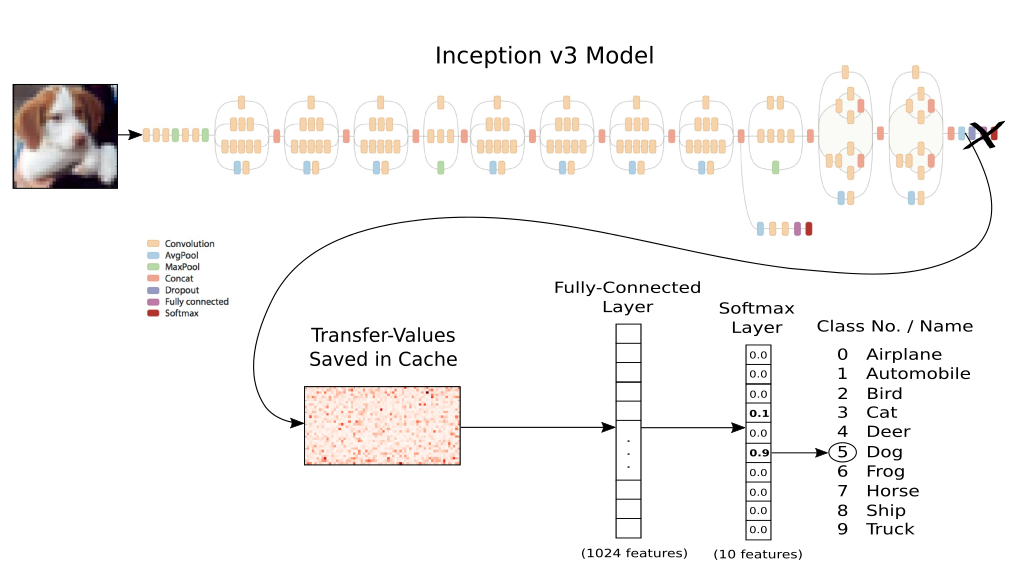

In [1]:
from IPython.display import Image, display
Image('/home/feliphegaliza/projects/CompCarsClassification/myWork/retrain/notebook_images/08_transfer_learning_flowchart.png')

# How classification works

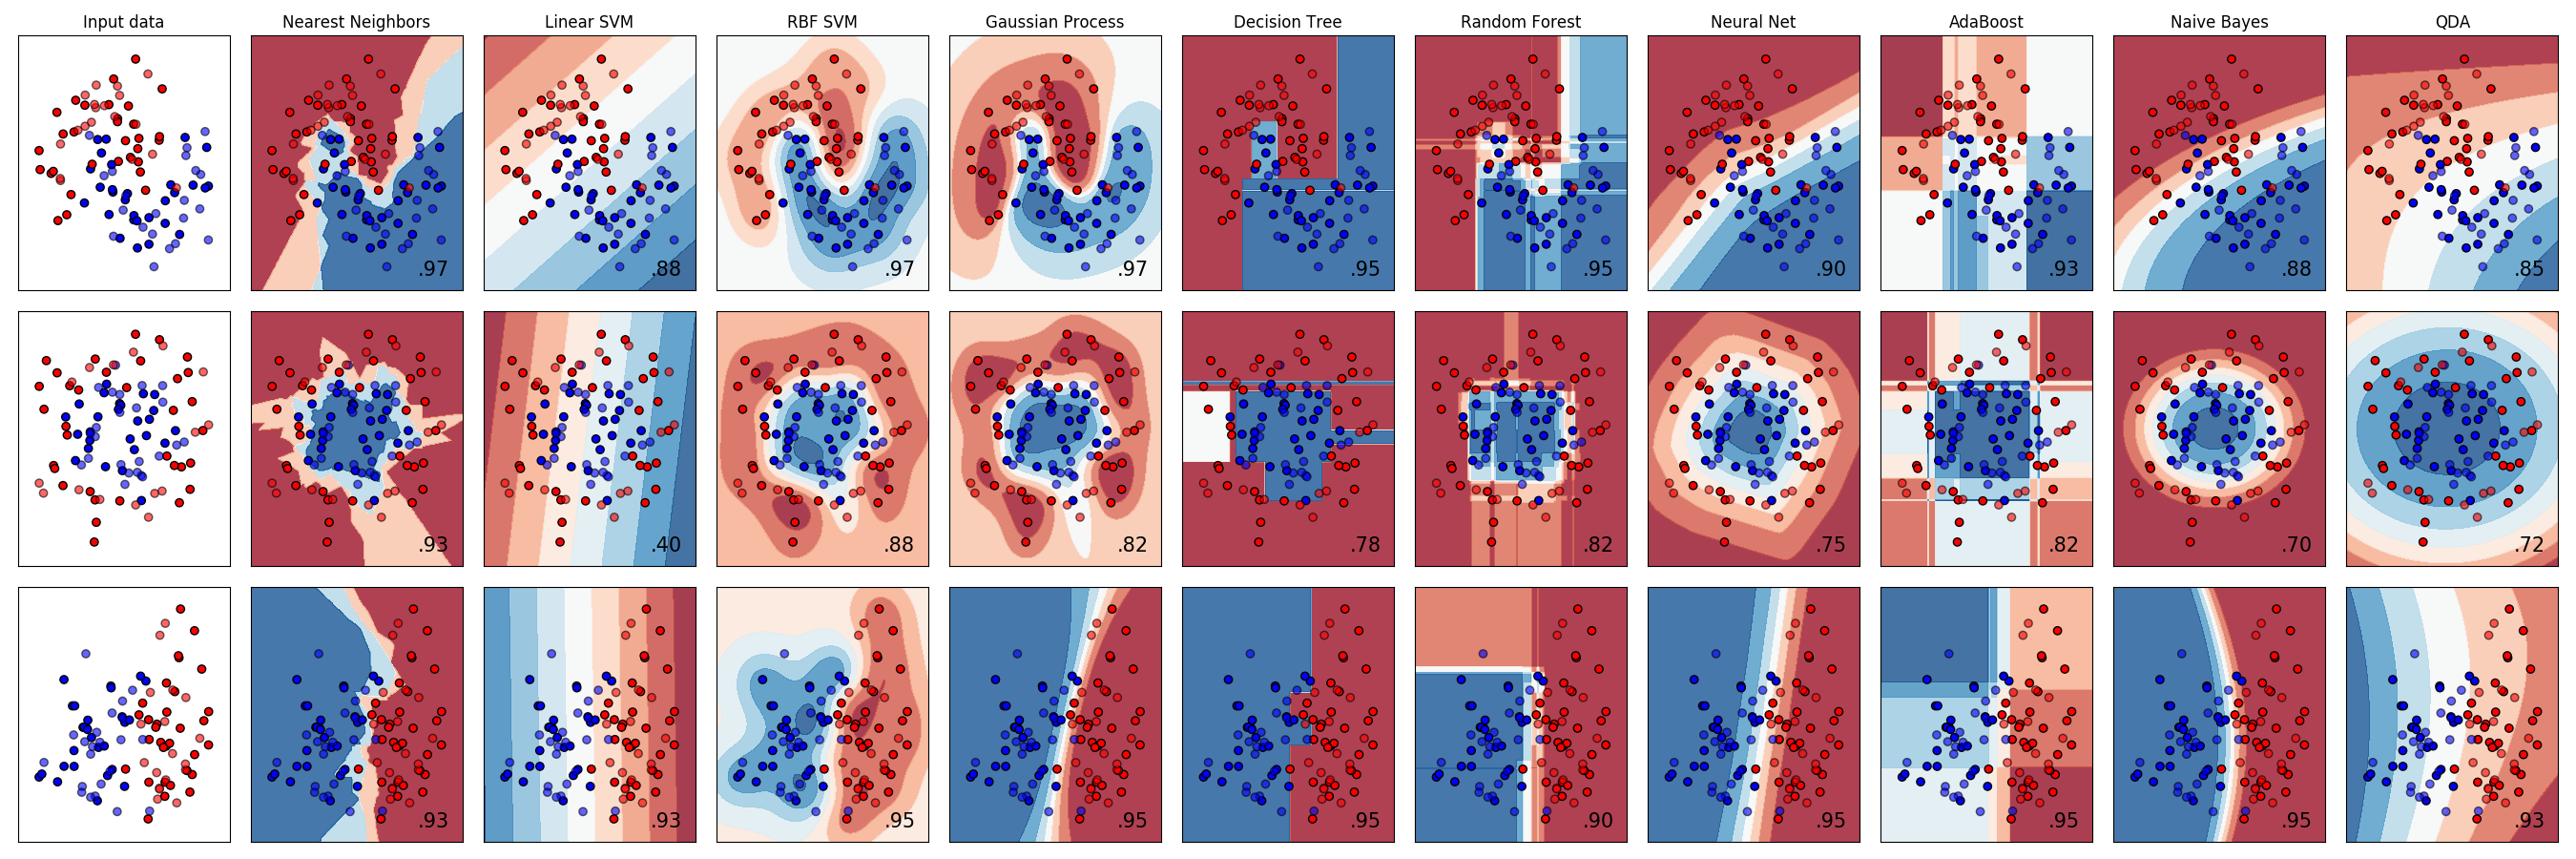

In [2]:
Image('http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png')

# Car maker-model classification challenge

Main challenges:
- One car has many viewpoints
- Some car models from different makers are similar

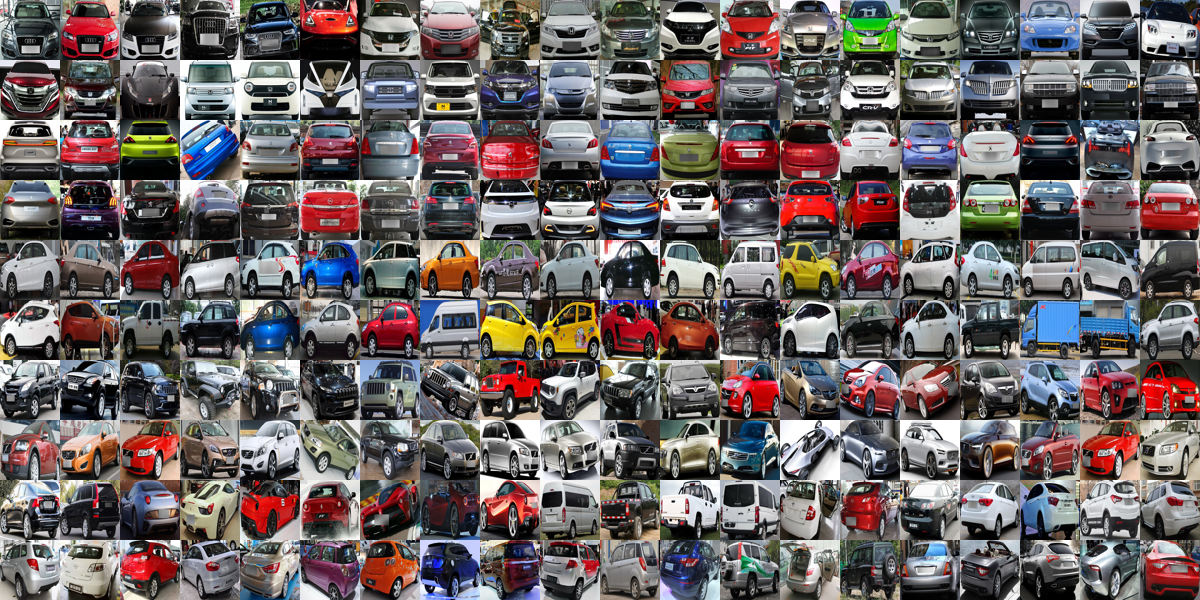

In [3]:
Image('http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/illustration.png')

# Inception v3 retraining analysis

Main investigations:

- Is the Inception v3 architecture generating a good representation for classification of car maker-model?
- Why sometimes Inception v3 retraining results in bad accuracy?
- How can we improve classification accuracy?

The analysis below has the goal of answering these questions.


# Code

By default the implementation of Inception v3 retraining available in [Tensorflow GitHub repository](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/image_retraining/retrain.py), generates a repository called bottlenecks. This directory contains all folders named with class names, and inside each folder there are .txt files with *2048 features generated by the Inception v3 convolutional layers*  

In [4]:
import embedding_visualization as embv
import tensorflow as tf
import matplotlib.patheffects as PathEffects
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 5 car models dataset 
#### classes: 'vw_gol' 'fiat_stilo' 'fiat_palio' 'fiat_doblo' 'ford_ecosport'

In [5]:
BOTTLENECK_DIR = "/home/feliphegaliza/projects/car-classification/bottlenecks"
transfer_values, targets, classes, num_bottleneck_files = embv.extract_features(BOTTLENECK_DIR)
transfer_values_X_pca = embv.normalize_values(embv.get_pca(transfer_values))


In [6]:
print("transfer_values shape: " + str(transfer_values.shape))
print("transfer_values_pca shape: "+ str(transfer_values_X_pca.shape))
print("classes" + str(classes))

transfer_values shape: (350, 2048)
transfer_values_pca shape: (350, 2)
classes['vw_gol' 'fiat_stilo' 'fiat_palio' 'fiat_doblo' 'ford_ecosport']


# PCA - Principal component analysis

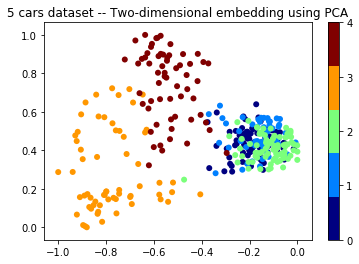

In [7]:
title("5 cars dataset -- Two-dimensional embedding using PCA")
pylab.rcParams['figure.figsize'] = (15, 10)
embv.make_scatter_plot(classes, targets,transfer_values_X_pca)

In [8]:
classes

array(['vw_gol', 'fiat_stilo', 'fiat_palio', 'fiat_doblo', 'ford_ecosport'], 
      dtype='|S13')

In [9]:
transfer_values_reduced_tsne, X_pca_train, y_pca_train = embv.get_tsne(transfer_values, targets,n_train_samples=5000) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 3.393287
[t-SNE] Iteration 25: error = 0.8255671, gradient norm = 0.0203181
[t-SNE] Iteration 50: error = 0.8442845, gradient norm = 0.0176727
[t-SNE] Iteration 75: error = 0.7001280, gradient norm = 0.0140112
[t-SNE] Iteration 100: error = 0.9035884, gradient norm = 0.0171388
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.903588
[t-SNE] Iteration 125: error = 0.7162555, gradient norm = 0.0124326
[t-SNE] Iteration 150: error = 1.0532321, gradient norm = 0.0200404
[t-SNE] Iteration 175: error = 1.5212368, gradient norm = 0.0255222
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.903588


In [10]:
print("transfer_values_reduced_tsne.shape: "+ str(transfer_values_reduced_tsne.shape))

transfer_values_reduced_tsne.shape: (350, 2)


# t-SNE - t-Distributed Stochastic Neighbor Embedding

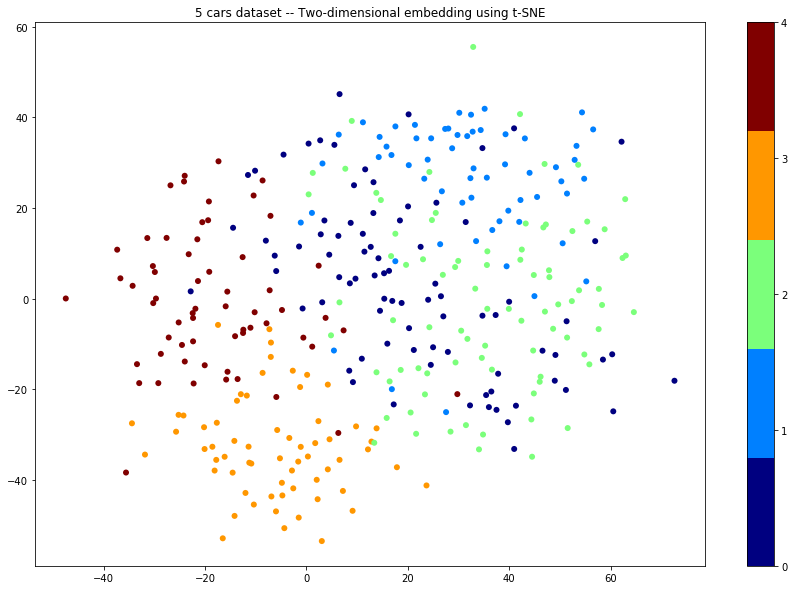

In [11]:
title("5 cars dataset -- Two-dimensional embedding using t-SNE")
embv.make_scatter_plot(classes, y_pca_train,transfer_values_reduced_tsne)

# 10 car models dataset

#### classes: 'fiat_stilo', 'fiat_doblo', 'vw_gol', 'fiat_palio', 'ford_ecosport', 'honda_elysion_2012', 'lincoln_MKS_2010', 'peugeot_2008_2014', 'bmw_3_series', 'peugeot_108_2014'

## Retrain Log
INFO:tensorflow:Looking for images in 'fiat_doblo'
INFO:tensorflow:Looking for images in 'fiat_palio'
INFO:tensorflow:Looking for images in 'fiat_stilo'
INFO:tensorflow:Looking for images in 'ford_ecosport'
INFO:tensorflow:Looking for images in 'vw_gol'
INFO:tensorflow:Looking for images in 'fiat_doblo'
INFO:tensorflow:Looking for images in 'fiat_palio'
INFO:tensorflow:Looking for images in 'fiat_stilo'
INFO:tensorflow:Looking for images in 'ford_ecosport'
INFO:tensorflow:Looking for images in 'honda_elysion_2012'
INFO:tensorflow:Looking for images in 'lincoln_MKS_2010'
INFO:tensorflow:Looking for images in 'peugeot_2008_2014'
INFO:tensorflow:Looking for images in 'peugeot_108_2014'
INFO:tensorflow:Looking for images in 'bmw_3_series
INFO:tensorflow:2017-09-29 09:41:30.092594: Step 730: Cross entropy = 0.322491
INFO:tensorflow:2017-09-29 09:41:30.147861: Step 730: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2017-09-29 09:41:30.718909: Step 740: Train accuracy = 97.0%
INFO:tensorflow:2017-09-29 09:41:30.719041: Step 740: Cross entropy = 0.344691
INFO:tensorflow:2017-09-29 09:41:30.775659: Step 740: Validation accuracy = 92.0% (N=100)
INFO:tensorflow:2017-09-29 09:41:31.291357: Step 749: Train accuracy = 97.0%
INFO:tensorflow:2017-09-29 09:41:31.291481: Step 749: Cross entropy = 0.307915
INFO:tensorflow:2017-09-29 09:41:31.346640: Step 749: Validation accuracy = 93.0% (N=100)
INFO:tensorflow:Final test accuracy = 91.0% (N=89)
INFO:tensorflow:Froze 2 variables.
Converted 2 variables to const ops.

In [12]:
BOTTLENECK_DIR = "/home/feliphegaliza/projects/CompCarsClassification/myWork/classify_maker_model/bottlenecks"
transfer_values, targets, classes, num_bottleneck_files = embv.extract_features(BOTTLENECK_DIR)

In [13]:
transfer_values_reduced_tsne, X_pca_train, y_pca_train = embv.get_tsne(transfer_values,targets,5000) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 814 / 814
[t-SNE] Mean sigma: 3.325544
[t-SNE] Iteration 25: error = 1.0979573, gradient norm = 0.0153130
[t-SNE] Iteration 50: error = 1.1186516, gradient norm = 0.0167212
[t-SNE] Iteration 75: error = 0.7803914, gradient norm = 0.0076679
[t-SNE] Iteration 100: error = 0.7885947, gradient norm = 0.0103238
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.788595
[t-SNE] Iteration 125: error = 0.7064044, gradient norm = 0.0047689
[t-SNE] Iteration 150: error = 0.7230079, gradient norm = 0.0071418
[t-SNE] Iteration 175: error = 0.7563673, gradient norm = 0.0076573
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.788595


# t-SNE

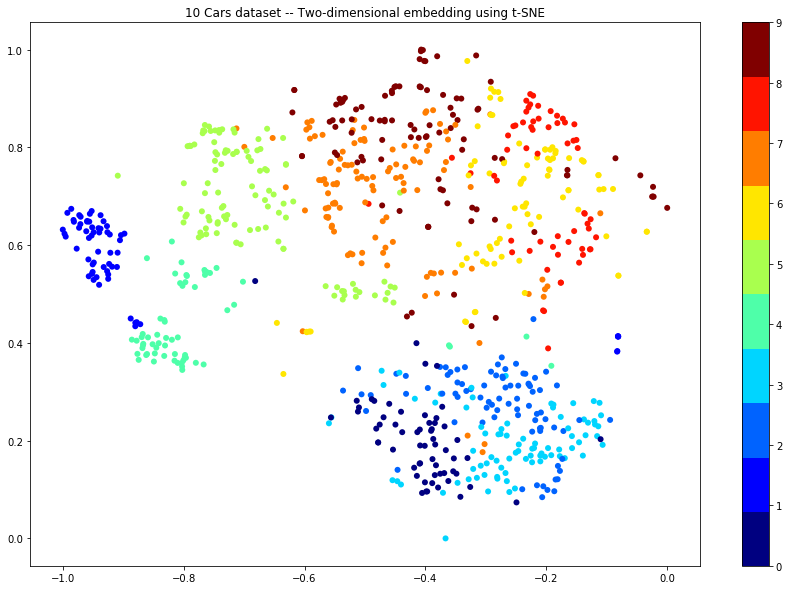

In [14]:
transfer_values_reduced_tsne = embv.normalize_values(transfer_values_reduced_tsne)
title("10 Cars dataset -- Two-dimensional embedding using t-SNE")
embv.make_scatter_plot(classes, y_pca_train,transfer_values_reduced_tsne)

In [15]:
classes

array(['fiat_stilo', 'fiat_doblo', 'vw_gol', 'fiat_palio', 'ford_ecosport',
       'honda_elysion_2012', 'lincoln_MKS_2010', 'peugeot_2008_2014',
       'bmw_3_series', 'peugeot_108_2014'], 
      dtype='|S18')

# 196 car models dataset

In [16]:
BOTTLENECK_DIR = "/home/feliphegaliza/projects/CompCarsClassification/myWork/classify_maker_model/bottlenecks_dirs"
transfer_values, targets, classes, num_bottleneck_files = embv.extract_features(BOTTLENECK_DIR)

In [17]:
transfer_values_X_pca = embv.normalize_values(embv.get_pca(transfer_values))

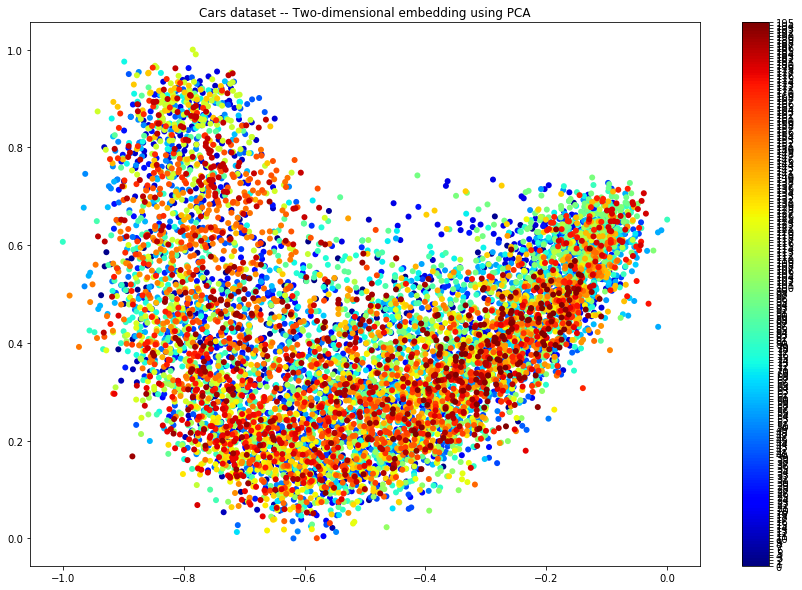

In [18]:
title("Cars dataset -- Two-dimensional embedding using PCA")
embv.make_scatter_plot(classes, targets,transfer_values_X_pca)

In [19]:
len(classes)

196

In [20]:
classes

array(['Cadillac SRX SUV 2012', 'Volvo 240 Sedan 1993',
       'Toyota 4Runner SUV 2012',
       'Chevrolet Corvette Ron Fellows Edition Z06 2007',
       'Bentley Mulsanne Sedan 2011', 'BMW X5 SUV 2007',
       'Chevrolet Malibu Hybrid Sedan 2010', 'Hyundai Santa Fe SUV 2012',
       'FIAT 500 Abarth 2012', 'Toyota Sequoia SUV 2012',
       'Ford Focus Sedan 2007', 'HUMMER H2 SUT Crew Cab 2009',
       'Audi S5 Coupe 2012',
       'Lamborghini Gallardo LP 570-4 Superleggera 2012',
       'Chevrolet Silverado 1500 Classic Extended Cab 2007',
       'Aston Martin Virage Coupe 2012', 'GMC Canyon Extended Cab 2012',
       'Rolls-Royce Phantom Drophead Coupe Convertible 2012',
       'Audi S5 Convertible 2012', 'Dodge Charger SRT-8 2009',
       'Acura RL Sedan 2012', 'Mercedes-Benz E-Class Sedan 2012',
       'Volkswagen Golf Hatchback 2012', 'Ford Fiesta Sedan 2012',
       'Volkswagen Golf Hatchback 1991', 'BMW 1 Series Coupe 2012',
       'Dodge Sprinter Cargo Van 2009', 'Ford F-150 R

In [21]:
transfer_values_reduced_tsne, X_pca_train, y_pca_train = embv.get_tsne(transfer_values,targets,5000) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.254201
[t-SNE] Iteration 25: error = 1.7360568, gradient norm = 0.0102065
[t-SNE] Iteration 50: error = 1.6856556, gradient norm = 0.0057121
[t-SNE] Iteration 75: error = 1.5234177, gradient norm = 0.0018817
[t-SNE] Iteration 100: error = 1.4884610, gradient norm = 0.0015705
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.488461
[t-SNE] Iteration 125: error = 1.4294301, gradient norm = 0.0011824
[t-SNE] Iteration 150: error = 1.4099079, gradient norm = 0.0010839
[t-SNE] Iteration 175: error = 1.4049044, gradient norm = 0.0010630
[t-SNE] 

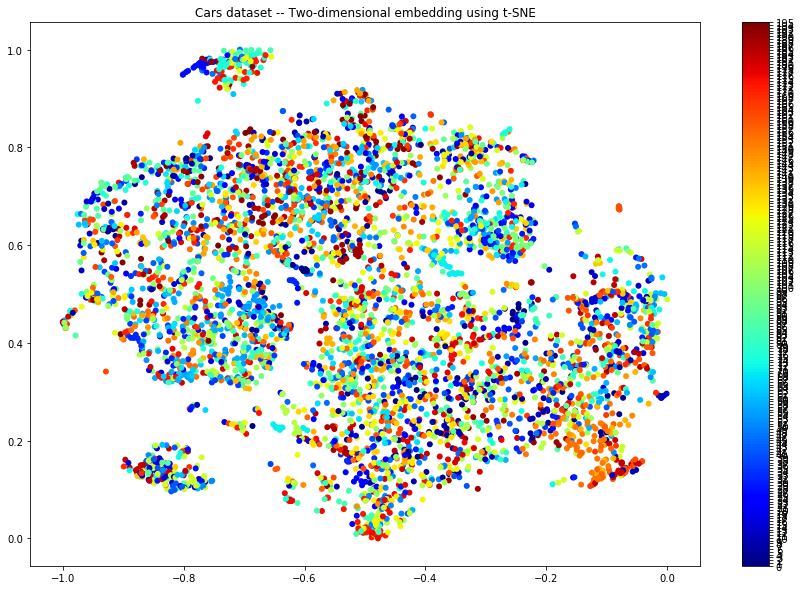

In [22]:
transfer_values_reduced_tsne = embv.normalize_values(transfer_values_reduced_tsne)
title("Cars dataset -- Two-dimensional embedding using t-SNE")
embv.make_scatter_plot(classes, y_pca_train,transfer_values_reduced_tsne)

# 77 Car Type-ViewPoints dataset

In [23]:
BOTTLENECK_DIR = "/home/feliphegaliza/projects/CompCarsClassification/myWork/retrain/bottlenecks"
transfer_values, targets, classes, num_bottleneck_files = embv.extract_features(BOTTLENECK_DIR)

In [24]:
transfer_values_X_pca = embv.normalize_values(embv.get_pca(transfer_values))

# PCA

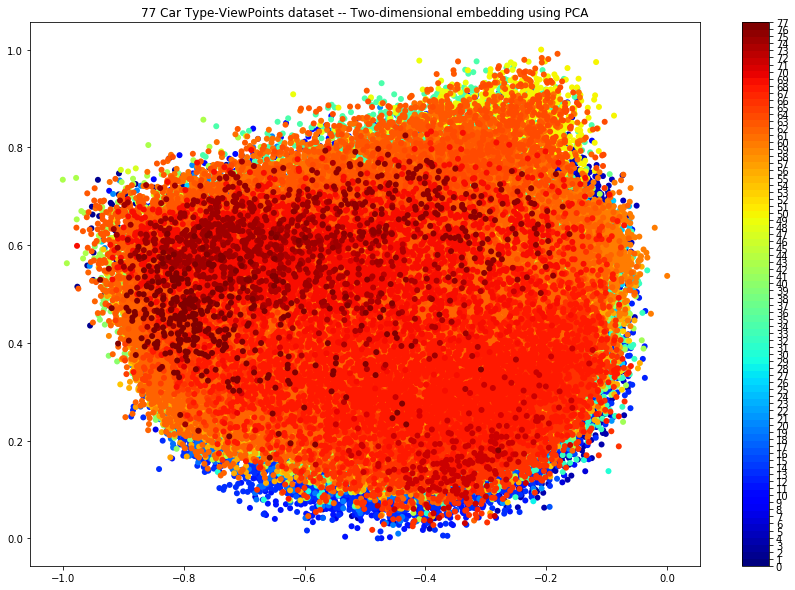

In [26]:
title("77 Car Type-ViewPoints dataset -- Two-dimensional embedding using PCA")
embv.make_scatter_plot(classes, targets,transfer_values_X_pca)

# t-SNE

In [27]:
classes

array(['minibusuncertain', 'hardtopconvertiblefront', 'sedanrear',
       'SUVside', 'minibusfrontside', 'MPVfrontside', 'crossoverside',
       'hardtopconvertibleside', 'estatefront', 'estatefrontside',
       'hatchbackfront', 'sedanside', 'MPVrearside', 'unknownside',
       'pickupuncertain', 'unknownuncertain', 'estaterearside',
       'fastbackfrontside', 'sportsside', 'fastbackside', 'fastbackfront',
       'crossoverrearside', 'crossoverfrontside', 'fastbackuncertain',
       'pickuprearside', 'minibusside', 'hardtopconvertiblerear',
       'SUVrear', 'hatchbackrear', 'hatchbackuncertain', 'sedanrearside',
       'fastbackrearside', 'MPVside', 'SUVfrontside', 'SUVfront',
       'MPVrear', 'crossoverrear', 'minibusrear', 'pickupside',
       'crossoverfront', 'sportsfrontside', 'sportsuncertain',
       'SUVrearside', 'sportsfront', 'sedanfrontside', 'convertiblerear',
       'crossoveruncertain', 'convertiblefront', 'convertibleside',
       'pickupfront', 'minibusfront', 'pic

In [28]:
transfer_values_reduced_tsne, X_pca_train, y_pca_train = embv.get_tsne(transfer_values,targets,5000) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.255665
[t-SNE] Iteration 25: error = 1.7420028, gradient norm = 0.0107688
[t-SNE] Iteration 50: error = 1.6839182, gradient norm = 0.0059601
[t-SNE] Iteration 75: error = 1.5129342, gradient norm = 0.0018025
[t-SNE] Iteration 100: error = 1.4789263, gradient norm = 0.0015048
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.478926
[t-SNE] Iteration 125: error = 1.4208124, gradient norm = 0.0011402
[t-SNE] Iteration 150: error = 1.4017984, gradient norm = 0.0010381
[t-SNE] Iteration 175: error = 1.3969990, gradient norm = 0.0010143
[t-SNE] 

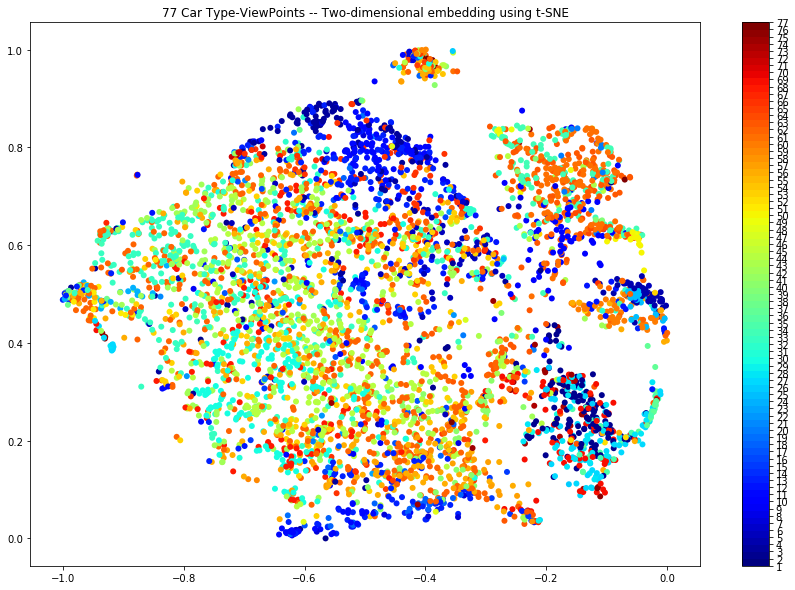

In [29]:
transfer_values_reduced_tsne = embv.normalize_values(transfer_values_reduced_tsne)
title("77 Car Type-ViewPoints -- Two-dimensional embedding using t-SNE")
embv.make_scatter_plot(classes, y_pca_train,transfer_values_reduced_tsne)

In [30]:
classes

array(['minibusuncertain', 'hardtopconvertiblefront', 'sedanrear',
       'SUVside', 'minibusfrontside', 'MPVfrontside', 'crossoverside',
       'hardtopconvertibleside', 'estatefront', 'estatefrontside',
       'hatchbackfront', 'sedanside', 'MPVrearside', 'unknownside',
       'pickupuncertain', 'unknownuncertain', 'estaterearside',
       'fastbackfrontside', 'sportsside', 'fastbackside', 'fastbackfront',
       'crossoverrearside', 'crossoverfrontside', 'fastbackuncertain',
       'pickuprearside', 'minibusside', 'hardtopconvertiblerear',
       'SUVrear', 'hatchbackrear', 'hatchbackuncertain', 'sedanrearside',
       'fastbackrearside', 'MPVside', 'SUVfrontside', 'SUVfront',
       'MPVrear', 'crossoverrear', 'minibusrear', 'pickupside',
       'crossoverfront', 'sportsfrontside', 'sportsuncertain',
       'SUVrearside', 'sportsfront', 'sedanfrontside', 'convertiblerear',
       'crossoveruncertain', 'convertiblefront', 'convertibleside',
       'pickupfront', 'minibusfront', 'pic

# Google Flowers Example

Running [Google Flowers example](https://www.tensorflow.org/tutorials/image_retraining), you should see an accuracy value of between 90% and 95%. Why inception v3 retraining can reach high accuracy here? 

Let's see how Inception v3 is representing these flowers. 

In [31]:
BOTTLENECK_DIR = "/home/feliphegaliza/projects/flowes_retrain/bottlenecks"
transfer_values, targets, classes, num_bottleneck_files = embv.extract_features(BOTTLENECK_DIR)

In [32]:
transfer_values_reduced_tsne, X_pca_train, y_pca_train = embv.get_tsne(transfer_values,targets,5000) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3670
[t-SNE] Computed conditional probabilities for sample 2000 / 3670
[t-SNE] Computed conditional probabilities for sample 3000 / 3670
[t-SNE] Computed conditional probabilities for sample 3670 / 3670
[t-SNE] Mean sigma: 2.735723
[t-SNE] Iteration 25: error = 1.7940848, gradient norm = 0.0077889
[t-SNE] Iteration 50: error = 1.7017615, gradient norm = 0.0052156
[t-SNE] Iteration 75: error = 1.4203113, gradient norm = 0.0019422
[t-SNE] Iteration 100: error = 1.3691247, gradient norm = 0.0016256
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.369125
[t-SNE] Iteration 125: error = 1.2887037, gradient norm = 0.0012141
[t-SNE] Iteration 150: error = 1.2641896, gradient norm = 0.0011084
[t-SNE] Iteration 175: error = 1.2581593, gradient norm = 0.0010848
[t-SNE] Iteration 200: error = 1.2565318, gradient norm = 0.0010778
[t-SNE

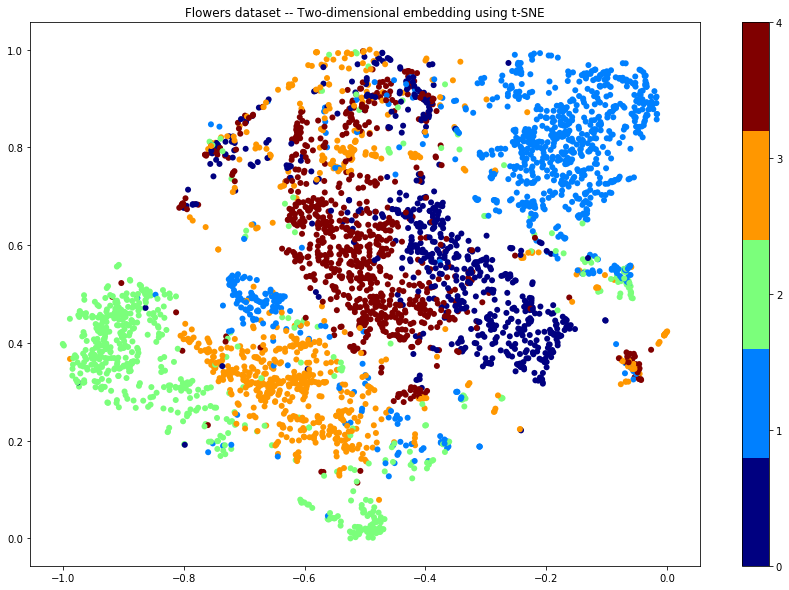

In [33]:
transfer_values_reduced_tsne = embv.normalize_values(transfer_values_reduced_tsne)
title("Flowers dataset -- Two-dimensional embedding using t-SNE")
embv.make_scatter_plot(classes, y_pca_train,transfer_values_reduced_tsne)